In [18]:
from pyspark.ml import PipelineModel
model2 = PipelineModel.load("vvvyes3") #load the saved model # use the model to classify the new data 

In [19]:
#Data Ingestion and Extraction
from pyspark.sql import SparkSession
jobDir = "tweetsJson.json" # new data without label
tweets = spark.read.json([jobDir])
tweets.count() 

26

In [20]:
tweets = tweets.select("text")
tweets.printSchema()

root
 |-- text: string (nullable = true)



In [21]:
df = model2.transform(tweets)# use the model to classify the new data , # get the predictions of new data

In [22]:
df.select("text","prediction","words").show(20,False)

+-------------------------------------------------------------------------------------+----------+-------------------------------------------------------------------------------------------------------+
|text                                                                                 |prediction|words                                                                                                  |
+-------------------------------------------------------------------------------------+----------+-------------------------------------------------------------------------------------------------------+
|كل يوم تاكد ان جود ام ف حيات اهم جودي شخصي ❤️                                        |1.0       |[كل, يوم, تاكد, ان, جود, ام, ف, حيات, اهم, جودي, شخصي, ❤️]                                             |
|يع انتي ام مفتكرتيش انا ابقي ابن مين -اغ اتوبيس 2019                                 |1.0       |[يع, انتي, ام, مفتكرتيش, انا, ابقي, ابن, مين, -اغ, اتوبيس, 2019]                          

In [23]:
import matplotlib.pyplot as plt # use matplotlib to draw the classification result in pichart
import pandas as pd

In [24]:
x=df.filter(df['prediction'] == 0).count() #count the prediction 0
y=df.filter(df['prediction'] == 1).count() #count the prediction 1
z=df.filter(df['prediction'] == 2).count() #count the prediction 2

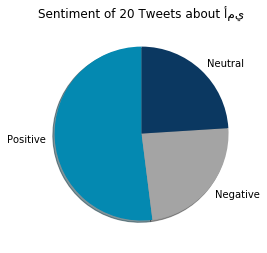

In [25]:
labels = 'Positive', 'Negative', 'Neutral' #labels apper on the pichart
sizes = [x, y, z] # count it before 
colors=['#0489B1','#A4A4A4','#0B3861']
Keyword = "أمي"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 20 Tweets about "+Keyword)
plt.show()